# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [73]:
# Import Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import time
import json
import citipy
import scipy.stats as st

from scipy.stats import linregress
from citipy import citipy

# Import API key
from api_keys import weather_api_key
from api_keys import g_key

#Output data as CSV to appropriate file
output_csv = "output_data/cities.csv"

#create a range for latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [74]:
#first make lists to hold latitudes and longitudes. Also make a list to hold cities.
lats_lngs = []
cities = []

#generate a random series of latitude and longitude coordinates. Use numpy random function.
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)

#use the zip function to combine and place into the empty lats_lngs list
lats_lngs = zip(lats, lngs)

#use citipy to find the city closest to the random lat/lng combos.
for lat_lng in lats_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    #For each unique city, add it to the empty cities list
    if city not in cities:
        cities.append(city)

#print the cities to confirm sample size is adequate
print(cities)
len(cities)


['batemans bay', 'belushya guba', 'cape town', 'saint-joseph', 'rikitea', 'butaritari', 'shingu', 'rasca', 'ushuaia', 'chake chake', 'bonavista', 'dunedin', 'faanui', 'bredasdorp', 'yulara', 'mogadishu', 'tuktoyaktuk', 'sakakah', 'port blair', 'mataura', 'laguna', 'verkhnyaya inta', 'tungkang', 'pilar', 'blagoyevo', 'new norfolk', 'ribeira grande', 'souillac', 'busselton', 'kalawit', 'qarqin', 'katsuura', 'north bend', 'kodiak', 'jamestown', 'honiara', 'bluff', 'bathsheba', 'punta arenas', 'upernavik', 'yellowknife', 'kismayo', 'georgetown', 'clyde river', 'lasa', 'vao', 'chokurdakh', 'attawapiskat', 'pisco', 'naze', 'lagoa', 'along', 'nyrob', 'columbus', 'vaini', 'tautira', 'matay', 'khatanga', 'novokayakent', 'nizwa', 'brae', 'camargo', 'puerto ayora', 'saint-philippe', 'great falls', 'castro', 'sirur', 'ponta do sol', 'aykhal', 'fianga', 'lompoc', 'suez', 'butembo', 'saskylakh', 'east london', 'nanortalik', 'viedma', 'nuuk', 'mahebourg', 'illoqqortoormiut', 'okhotsk', 'todos santos'

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [75]:
#first create the necessary lists and counters to perform all the requested operations
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
windspeed_list = []
index_counter = 0
set_counter = 1

#perform API Calls
##point to the url needed for the data and set the units for the output to imperial
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#set the url for the query
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#construct a for loop that matches city names with the city_list.
##Enumerate is the key here. Documentation: https://docs.python.org/3/library/functions.html?highlight=enumerate#enumerate
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        #now insert all the names of the lists we made and append to them
        city_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response["main"]["temp_max"])
        windspeed_list.append(response["wind"]["speed"])
        
        #use if and else statements pointing to the counters to loop through
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
            
        else:
            index_counter = index_counter + 1
        
        #return the results with an f string
        print(f"Processing Data {index_counter} of Set {set_counter}:{city}")
        
    #handle the errors with an exception
    except(KeyError, IndexError):
        print("City not located. Moving on.")
print("I'm Finished.")

Processing Data 1 of Set 1:batemans bay
City not located. Moving on.
Processing Data 2 of Set 1:cape town
Processing Data 3 of Set 1:saint-joseph
Processing Data 4 of Set 1:rikitea
Processing Data 5 of Set 1:butaritari
Processing Data 6 of Set 1:shingu
City not located. Moving on.
Processing Data 7 of Set 1:ushuaia
Processing Data 8 of Set 1:chake chake
Processing Data 9 of Set 1:bonavista
Processing Data 10 of Set 1:dunedin
Processing Data 11 of Set 1:faanui
Processing Data 12 of Set 1:bredasdorp
Processing Data 13 of Set 1:yulara
Processing Data 14 of Set 1:mogadishu
Processing Data 15 of Set 1:tuktoyaktuk
Processing Data 16 of Set 1:sakakah
Processing Data 17 of Set 1:port blair
Processing Data 18 of Set 1:mataura
Processing Data 19 of Set 1:laguna
Processing Data 20 of Set 1:verkhnyaya inta
City not located. Moving on.
Processing Data 21 of Set 1:pilar
Processing Data 22 of Set 1:blagoyevo
Processing Data 23 of Set 1:new norfolk
Processing Data 24 of Set 1:ribeira grande
Processing

Processing Data 49 of Set 4:gravelbourg
City not located. Moving on.
Processing Data 50 of Set 4:touros
City not located. Moving on.
Processing Data 0 of Set 5:abalak
Processing Data 1 of Set 5:port lincoln
Processing Data 2 of Set 5:san cristobal
Processing Data 3 of Set 5:atikokan
Processing Data 4 of Set 5:nemuro
Processing Data 5 of Set 5:antsohihy
Processing Data 6 of Set 5:kupang
Processing Data 7 of Set 5:constitucion
Processing Data 8 of Set 5:kloulklubed
City not located. Moving on.
Processing Data 9 of Set 5:vestmannaeyjar
City not located. Moving on.
Processing Data 10 of Set 5:ampanihy
Processing Data 11 of Set 5:sobradinho
Processing Data 12 of Set 5:bethel
Processing Data 13 of Set 5:krasnoselkup
Processing Data 14 of Set 5:ahipara
Processing Data 15 of Set 5:vila velha
Processing Data 16 of Set 5:najran
Processing Data 17 of Set 5:narsaq
Processing Data 18 of Set 5:namatanai
Processing Data 19 of Set 5:pimentel
Processing Data 20 of Set 5:at-bashi
Processing Data 21 of S

Processing Data 47 of Set 8:necochea
Processing Data 48 of Set 8:sibolga
Processing Data 49 of Set 8:grahamstown
Processing Data 50 of Set 8:la ronge
Processing Data 0 of Set 9:pochutla
Processing Data 1 of Set 9:pyshma
Processing Data 2 of Set 9:blytheville
Processing Data 3 of Set 9:buchanan
Processing Data 4 of Set 9:zhangzhou
Processing Data 5 of Set 9:chicama
Processing Data 6 of Set 9:pleszew
Processing Data 7 of Set 9:north myrtle beach
Processing Data 8 of Set 9:nouakchott
Processing Data 9 of Set 9:darhan
Processing Data 10 of Set 9:conde
Processing Data 11 of Set 9:idanre
City not located. Moving on.
Processing Data 12 of Set 9:oron
Processing Data 13 of Set 9:kerema
City not located. Moving on.
Processing Data 14 of Set 9:pandan
Processing Data 15 of Set 9:bairiki
Processing Data 16 of Set 9:savannakhet
Processing Data 17 of Set 9:veraval
Processing Data 18 of Set 9:rewari
Processing Data 19 of Set 9:beloha
Processing Data 20 of Set 9:colares
Processing Data 21 of Set 9:voin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [76]:
#editing code for another push. had an error.
##create the dataframe with pd.DataFrame
weather_df = pd.DataFrame({
    "City" : city_list,
    "Country" : country_list,
    "Latitude" : lats_list,
    "Longitude" : lngs_list,
    "Maximum Temperature" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloudiness_list,
    "Wind Speed" : windspeed_list,
    "Date" : date_list
})

#display the dataframe
weather_df.head()

###lists for easy copying and inclusion
#city_list = []
#cloudiness_list = []
#country_list = []
#date_list = []
#humidity_list = []
#lats_list = []
#lngs_list = []
#temp_max_list = []
#windspeed_list = []

,City,Country,Latitude,Longitude,Maximum Temperature,Humidity,Clouds,Wind Speed,Date
0,Batemans Bay,AU,-35.7167,150.1833,53.20,79,100,3.83,1622656296
1,Cape Town,ZA,-33.9258,18.4232,62.11,80,20,4.00,1622656082
2,Saint-Joseph,RE,-21.3667,55.6167,75.58,79,95,14.41,1622656298
3,Rikitea,PF,-23.1203,-134.9692,71.87,60,98,17.29,1622656277
4,Butaritari,KI,3.0707,172.7902,82.65,79,100,15.59,1622656299


In [77]:
#count the data to make sure it's enough for the exercise
weather_df.count()

City                   559
Country                559
Latitude               559
Longitude              559
Maximum Temperature    559
Humidity               559
Clouds                 559
Wind Speed             559
Date                   559
dtype: int64

In [78]:
#output the data results to the appropriate csv file for the hw
##documentation for .to_csv here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
weather_df.to_csv('output_csv', index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [79]:
weather_df.describe()

,Latitude,Longitude,Maximum Temperature,Humidity,Clouds,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,19.436835,16.961966,69.568980,67.409660,58.370304,7.616458,1.622656e+09
std,32.706127,88.798904,16.204979,22.551303,35.785360,4.933379,8.479858e+01
min,-54.800000,-175.200000,25.540000,5.000000,0.000000,0.000000,1.622656e+09
25%,-6.730150,-60.119100,57.245000,55.000000,22.000000,3.960000,1.622656e+09
50%,21.116700,22.957300,72.930000,73.000000,70.000000,6.910000,1.622656e+09
75%,47.516750,92.688350,80.700000,84.000000,91.000000,10.360000,1.622656e+09
max,78.218600,179.316700,111.740000,100.000000,100.000000,27.630000,1.622656e+09


In [80]:
#  Get the indices of cities that have humidity over 100%.
print('The Maximum Humidity observed in the DataFrame is 100%. No cities have humidity values greater than 100%. Skipping next step as instructed.')

The Maximum Humidity observed in the DataFrame is 100%. No cities have humidity values greater than 100%. Skipping next step as instructed.


In [81]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

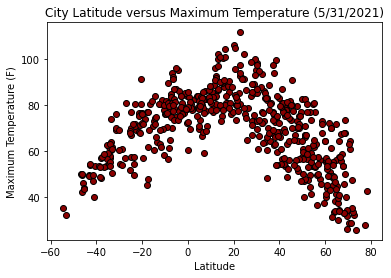

In [82]:
#figure out one, and that's the template for all.
##use plt.scatter . Then label title, xlabel, ylabel. Gonna use the grid. Use .savefig for .png files.
###documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
####color documenation: https://matplotlib.org/stable/gallery/color/named_colors.html
plt.scatter(weather_df['Latitude'], weather_df['Maximum Temperature'], color="darkred", edgecolor="black")

plt.title("City Latitude versus Maximum Temperature (5/31/2021)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("../Images/Lat_v_MaxT.png")

## Latitude vs. Humidity Plot

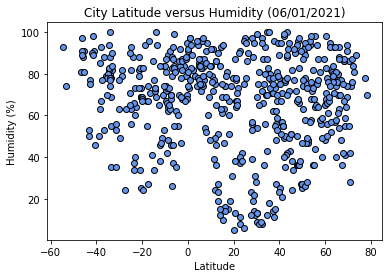

In [83]:
#with the code successfully running for Latitude Vs. Temperature, copy code as template and re-code as needed for task
##make sure to change output .png names
###just realized i didn't change the date from yesterday for the first plot. not going to there, will do it for work today.
plt.scatter(weather_df['Latitude'], weather_df['Humidity'], color="cornflowerblue", edgecolor="black")

plt.title("City Latitude versus Humidity (06/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Lat_v_Hum.png")

## Latitude vs. Cloudiness Plot

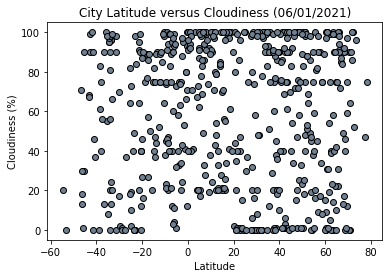

In [84]:
#ctrl+c ctrl+v
##make sure to change output .png name and date
###just realized i didn't output clouds/cloudiness data in the DataFrame step. Have to go back and rerun it and fix it.
####went back and re-ran cells. DF updated. Moving forward
plt.scatter(weather_df['Latitude'], weather_df['Clouds'], color="slategrey", edgecolor="black")

plt.title("City Latitude versus Cloudiness (06/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Lat_v_Cloud.png")

## Latitude vs. Wind Speed Plot

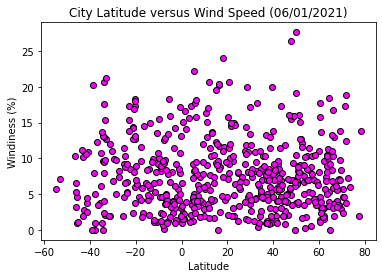

In [85]:
#ctrl+c ctrl+v
##make sure to change output .png name and date
plt.scatter(weather_df['Latitude'], weather_df['Wind Speed'], color="fuchsia", edgecolor="black")

plt.title("City Latitude versus Wind Speed (06/01/2021)")
plt.xlabel("Latitude")
plt.ylabel("Windiness (%)")
plt.savefig("../Images/Lat_v_Wind.png")

## Linear Regression

In [86]:
#already imported linregress in the depnendencies. Checked. Confirmed.
##Have to do this with both hemispheres. So start by creating DataFrames for each hemisphere.
n_hemisphere_df = weather_df.loc[(weather_df['Latitude']>0)]
#n_hemisphere_df.head()
s_hemisphere_df = weather_df.loc[(weather_df['Latitude']<0)]
#s_hemisphere_df.head()

In [91]:
#moved DF portion to cell above. Code seems to run but i don't see the plot. Not throwing an error.
###now that we have DFs, we can perform the regression.
####documentation here: documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
#####first define the function
def plotLinearRegression(x, y, xlabl, ylabl, lblpos):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    print(f"The r-squared value is: {rvalue}")
    regression_value = x * slope + intercept
    line_equation = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))

##plot test not working. going to try it for north and south hemispere data and see if i need to troubleshoot.  
##might be an indent/tab error. This may all need to be tabbed over. Trying now.
    plt.scatter(x, y)
    plt.plot(x, regression_value, "r-")
    plt.annotate(line_equation, lblpos, fontsize = 12, color='black')
    plt.xlabel(xlabl)
    plt.ylabel(ylabl)
    plt.savefig("../Images/LinRegress_initial.png")
    plt.show()

In [88]:
#Plot the results in the cell above to see if it's reasonable.
##having errors running in this cell, moving up code to previous cell

n_hemisphere_df.count()

City                   383
Country                383
Latitude               383
Longitude              383
Maximum Temperature    383
Humidity               383
Clouds                 383
Wind Speed             383
Date                   383
dtype: int64

In [89]:
s_hemisphere_df.count()


City                   176
Country                176
Latitude               176
Longitude              176
Maximum Temperature    176
Humidity               176
Clouds                 176
Wind Speed             176
Date                   176
dtype: int64

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared value is: -0.7190367186470842


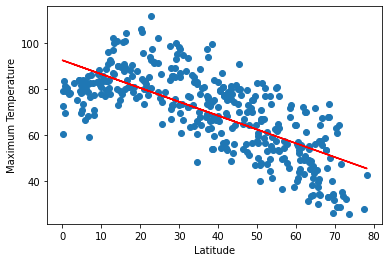

<Figure size 432x288 with 0 Axes>

In [94]:
#starting this mess of a cell over.
##assign Latitude and Maximum Temperature to x and y and the call the function plotLinearRegression we defined above.
xlbl = "Latitude"
ylbl = "Maximum Temperature"
lblpos = (0,10)
plotLinearRegression(n_hemisphere_df[xlbl], n_hemisphere_df[ylbl],xlbl, ylbl, lblpos)
plt.savefig("../Images/North_Temp_v_Lat.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [ ]:
#since I got the linregress working, copy/paste the code and adjust for the changing tasks
xlbl = "Latitude"
ylbl = "Maximum Temperature"
lblpos = (0,20)
plotLinearRegression(s_hemisphere_df[xlbl], s_hemisphere_df[ylbl],xlbl, ylbl, lblpos)
plt.savefig("../Images/South_Temp_v_Lat.png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression